<h1>MNIST DATASET </h1>

# Import Libraries

In [1]:
!pip show tensorflow
!pip show keras

Name: tensorflow
Version: 2.13.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: c:\users\silwa\.conda\envs\daks\lib\site-packages
Requires: tensorflow-intel
Required-by: retina-face
Name: keras
Version: 2.13.1
Summary: Deep learning for humans.
Home-page: https://keras.io/
Author: Keras team
Author-email: keras-users@googlegroups.com
License: Apache 2.0
Location: c:\users\silwa\.conda\envs\daks\lib\site-packages
Requires: 
Required-by: tensorflow-intel


In [2]:
!pip install tensorflow==2.13.0 keras==2.13.1


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\silwa\\.conda\\envs\\daks\\Lib\\site-packages\\google\\_upb\\_message.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.




  Using cached numpy-1.24.3-cp38-cp38-win_amd64.whl.metadata (5.6 kB)
  Using cached protobuf-4.25.5-cp38-cp38-win_amd64.whl.metadata (541 bytes)
  Using cached typing_extensions-4.5.0-py3-none-any.whl.metadata (8.5 kB)
Using cached numpy-1.24.3-cp38-cp38-win_amd64.whl (14.9 MB)
Using cached protobuf-4.25.5-cp38-cp38-win_amd64.whl (413 kB)
Using cached typing_extensions-4.5.0-py3-none-any.whl (27 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.12.2
    Uninstalling typing_extensions-4.12.2:
      Successfully uninstalled typing_extensions-4.12.2
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.2
    Uninstalling protobuf-3.20.2:
      Successfully uninstalled protobuf-3.20.2
  Rolling back uninstall of protobuf
  Moving to c:\users\silwa\appdata\roaming\python\python38\site-packages\google\protobuf\
   from C:\Users\silwa\AppData\Roaming\Python\Python38\site-packages\google\~rotobuf
  Moving to c:\users\

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import os
import cv2
import numpy as np
import tensorflow as tf

from sklearn.model_selection import train_test_split

from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,LSTM
from keras.optimizers import SGD

import warnings                      
warnings.simplefilter("ignore")  # ignores the warning

# Load .npy file

In [4]:
# Load the MNIST data from .npy file
data = np.load('data/mnist_data.npy', allow_pickle=True)
images = data.item().get('images')
labels = data.item().get('labels')

# Visualize

In [5]:
import random

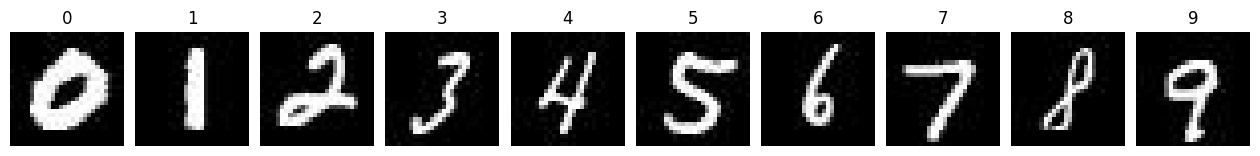

In [6]:
def random_value_for_index(labels, target_value):
    indices = [index for index, value in enumerate(labels) if value == target_value]
    return random.choice(indices)

# Define categories
categories = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# Create subplots
fig, axs = plt.subplots(1, 10, figsize=(16, 16))

for index, category in enumerate(categories):
    # Select random image index from specific category
    random_index = random_value_for_index(labels, category)
    # Plot the random image
    axs[index].imshow(images[random_index].reshape(28, 28), cmap='gray')
    axs[index].axis('off')
    axs[index].set_title(category)

plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.show()

# Train Test Split

In [7]:
x_train,x_test,y_train,y_test = train_test_split(images, labels, test_size=0.2, random_state=11)

In [8]:
x_train = x_train.reshape(-1, 28, 28)
x_test = x_test.reshape(-1, 28, 28)

In [9]:
print("X_train shape : ",x_train.shape)
print("y_train shape : ",y_train.shape)
print("X_test shape : ",x_test.shape)
print("y_test shape : ",y_test.shape)


X_train shape :  (33600, 28, 28)
y_train shape :  (33600,)
X_test shape :  (8400, 28, 28)
y_test shape :  (8400,)


# Normalization

In [10]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [11]:
x_train.shape

(33600, 28, 28)

# Train RNN model

In [12]:
model = Sequential()
model.add(LSTM(128, input_shape=(28,28 )))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               80384     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 98186 (383.54 KB)


Trainable params: 98186 (383.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Early Stoping

In [14]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',patience=5)

# Compile

In [15]:
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# Train

In [16]:
history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.1,callbacks=[early_stop])

Epoch 1/100
945/945 [==============================] - 50s 44ms/step - loss: 2.2859 - accuracy: 0.1805 - val_loss: 2.2662 - val_accuracy: 0.2554
Epoch 2/100
945/945 [==============================] - 42s 45ms/step - loss: 2.1978 - accuracy: 0.2692 - val_loss: 2.0374 - val_accuracy: 0.2920
Epoch 3/100
945/945 [==============================] - 55s 59ms/step - loss: 1.8453 - accuracy: 0.3507 - val_loss: 1.5988 - val_accuracy: 0.4363
Epoch 4/100
945/945 [==============================] - 53s 56ms/step - loss: 1.4614 - accuracy: 0.4673 - val_loss: 1.2255 - val_accuracy: 0.5539
Epoch 5/100
945/945 [==============================] - 52s 55ms/step - loss: 1.0855 - accuracy: 0.6097 - val_loss: 0.8347 - val_accuracy: 0.7006
Epoch 6/100
945/945 [==============================] - 47s 49ms/step - loss: 0.8080 - accuracy: 0.7175 - val_loss: 0.6270 - val_accuracy: 0.7875
Epoch 7/100
945/945 [==============================] - 50s 53ms/step - loss: 0.6243 - accuracy: 0.7948 - val_loss: 0.5381 - val_ac

# Metrics

In [15]:
metrics=pd.DataFrame(model.history.history)

<Axes: >

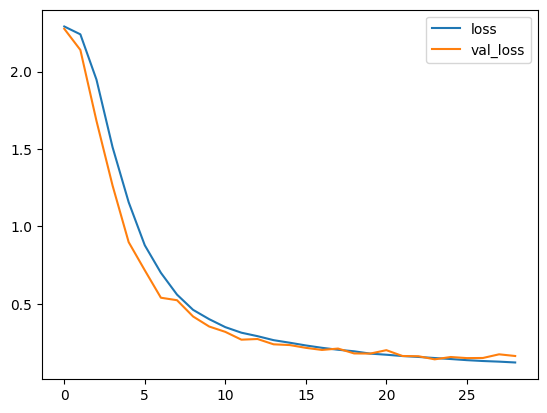

In [16]:
metrics[['loss','val_loss']].plot()

<Axes: >

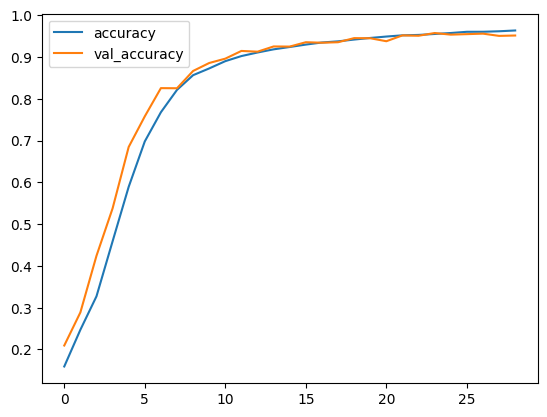

In [17]:
metrics[['accuracy', 'val_accuracy']].plot()

In [18]:
model.save("model/mnist_lstm.h5")

In [19]:
from keras.models import load_model
model= load_model("model/mnist_lstm.h5")

# Predict on Test data

In [20]:
x_test.shape

(8400, 28, 28)

In [21]:
y_pred = model.predict(x_test)

263/263 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step


In [22]:
y_pred

array([[2.6004219e-07, 9.9836308e-01, 3.5978446e-05, ..., 1.6822388e-04,
        1.1644567e-03, 1.9957513e-05],
       [1.4523414e-05, 3.6449308e-07, 1.4098631e-06, ..., 2.6428429e-04,
        2.1524636e-04, 9.9797565e-01],
       [3.6683131e-04, 3.1120371e-04, 1.4005830e-03, ..., 2.8767212e-07,
        6.7665690e-04, 3.1854049e-06],
       ...,
       [5.9097641e-08, 9.9943608e-01, 3.4665278e-05, ..., 3.1036721e-04,
        7.8672514e-05, 4.9202781e-06],
       [7.2259327e-06, 3.7612087e-06, 1.3251095e-06, ..., 4.6353221e-06,
        5.8213028e-04, 2.0911590e-04],
       [9.9302882e-01, 1.1104256e-06, 2.5739993e-03, ..., 1.3449779e-04,
        5.8521185e-04, 1.4656147e-03]], dtype=float32)

In [23]:
y_pred = np.argmax(y_pred, axis=1)

In [24]:
y_pred

array([1, 9, 6, ..., 1, 5, 0], dtype=int64)

<h2>Model Evaluation</h2>

In [25]:
from sklearn.metrics import accuracy_score,recall_score, precision_score, f1_score,classification_report

In [26]:
print("Model's acuracy :",accuracy_score(y_pred,y_test))
print("Recall-Score :",recall_score(y_pred,y_test,average="macro"))
print("Precision-Score :",precision_score(y_pred,y_test,average="macro"))
print("F1-Score :",f1_score(y_pred,y_test,average="macro"))

Model's acuracy : 0.9530952380952381
Recall-Score : 0.9533567723160511
Precision-Score : 0.9526603755783014
F1-Score : 0.9527289076481681


In [27]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       842
           1       0.99      0.96      0.97       958
           2       0.94      0.96      0.95       833
           3       0.97      0.91      0.94       929
           4       0.96      0.95      0.95       830
           5       0.96      0.96      0.96       773
           6       0.95      0.98      0.96       790
           7       0.94      0.98      0.96       870
           8       0.96      0.92      0.94       809
           9       0.90      0.94      0.92       766

    accuracy                           0.95      8400
   macro avg       0.95      0.95      0.95      8400
weighted avg       0.95      0.95      0.95      8400



# Confusion Matrix

In [28]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

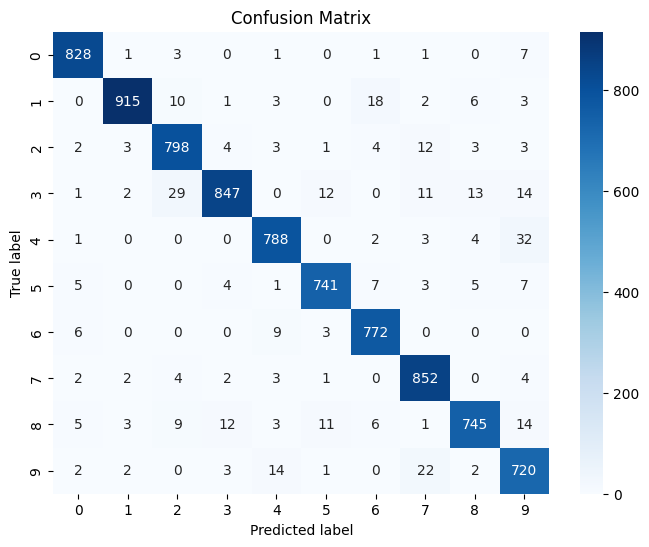

In [29]:
# Compute confusion matrix
cm = confusion_matrix(y_pred , y_test)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

# Predict

In [30]:
def classify_image(image):
    plt.imshow(cv2.resize(image,(28,28)),cmap='gray')
    print(image.shape)
    image = np.expand_dims(image, axis=0)
    print(image.shape)
    # Perform prediction
    prediction = np.argmax(model.predict(image))
    
    return prediction

(28, 28)
(1, 28, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


1

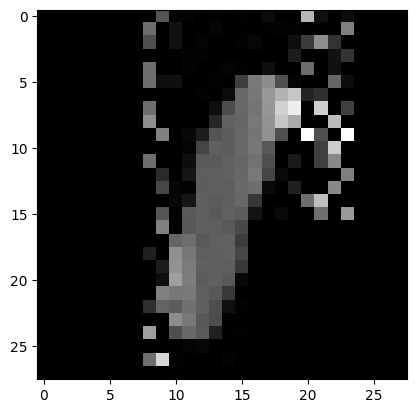

In [31]:
classify_image(x_test[0])

# Custom

In [32]:
def classify_image_custom(image):
    image = cv2.resize(image, (28, 28))
    print(image.shape)
    plt.imshow(image,cmap='gray')
    image = tf.keras.utils.normalize(image, axis=1)
    # plt.imshow(image,cmap='gray')
    plt.show()
    image = np.expand_dims(image, axis=0)
    # Perform prediction
    prediction = np.argmax(model.predict(image))
    
    return prediction

(28, 28)


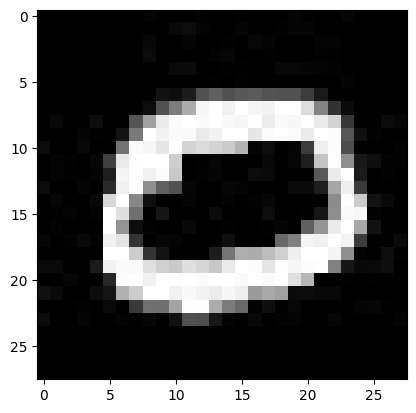

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


0

In [33]:
img = cv2.imread('data/test/img_2.jpg', cv2.IMREAD_GRAYSCALE)
classify_image_custom(img)